In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
import warnings
warnings.filterwarnings('ignore')
import numpy

In [2]:
data=pd.read_csv(r"C:\Users\TARUN\OneDrive\Desktop\IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

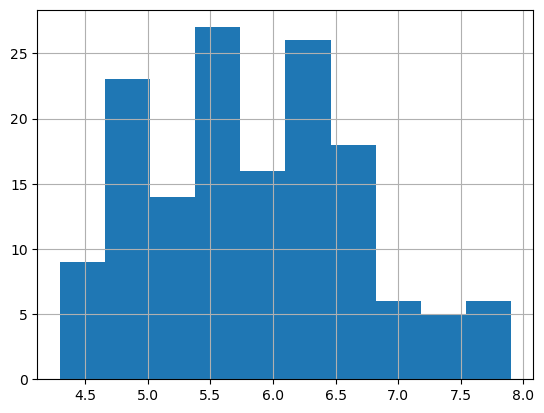

In [8]:
data['sepal_length'].hist()

<Axes: >

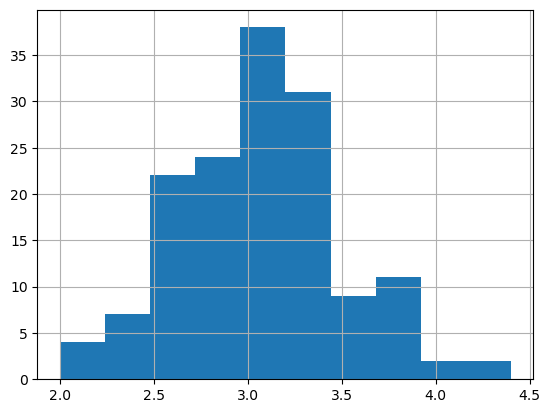

In [9]:
data['sepal_width'].hist()

<Axes: >

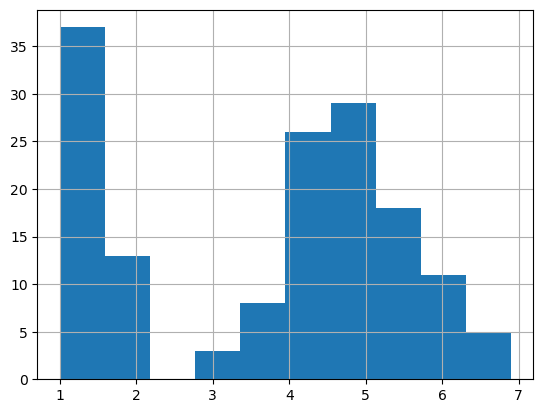

In [10]:
data['petal_length'].hist()

<Axes: >

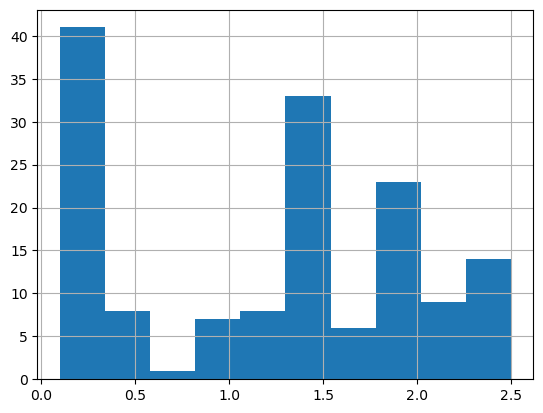

In [11]:
data['petal_width'].hist()

In [12]:
colors = ['red','orange','blue']
species = ['virginica','versicolor','setosa']

In [15]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

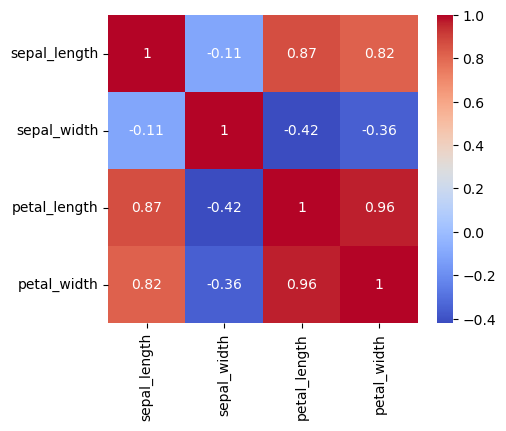

In [16]:
corr = data.corr()
fig , ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True, ax=ax, cmap = 'coolwarm')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



In [19]:
X = data.drop(columns=['species'])
Y = data['species']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [20]:
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy : ", model.score(x_test,y_test)*100)

Logistic Regression Accuracy :  93.33333333333333


In [21]:
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [22]:
print("Accuracy : ", model.score(x_test,y_test)*100)

Accuracy :  93.33333333333333


In [23]:
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy : ", model.score(x_test,y_test)*100)

K-nearest neighbors Accuracy :  91.11111111111111


In [24]:
model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy : ", model.score(x_test,y_test)*100)

Decision Tree Accuracy :  86.66666666666667


In [25]:
import pickle
filename = 'saved_model.sav'
pickle.dump(model,open(filename,'wb'))

In [26]:
load_model = pickle.load(open(filename,'rb'))

In [27]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array([1])

In [28]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
107,7.3,2.9,6.3,1.8
29,4.7,3.2,1.6,0.2
122,7.7,2.8,6.7,2.0
30,4.8,3.1,1.6,0.2


In [29]:
load_model.predict([[5,2,6,1]])

array([2])